In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\KPMG_VI_New_raw_data_update_final.xlsx


In [2]:
file_name = '../data/KPMG_VI_New_raw_data_update_final.xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


## CustomerDemographic

In [3]:
cust_demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic')
cust_demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
cust_demo_df.shape

(4000, 13)

In [5]:
cust_demo_df[cust_demo_df.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [6]:
print('customer_id blanks:', pd.isna(cust_demo_df['customer_id']).sum())

customer_id blanks: 0


In [7]:
pd.notna(cust_demo_df['customer_id'].unique()).sum()

4000

In [8]:
print('first_name blanks:', pd.isna(cust_demo_df['first_name']).sum())

first_name blanks: 0


gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
blanks: 0


(array([1.000e+00, 0.000e+00, 1.872e+03, 0.000e+00, 2.037e+03, 0.000e+00,
        8.800e+01, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

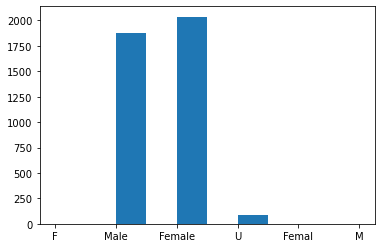

In [9]:
print('gender:', cust_demo_df['gender'].unique())
print('blanks:', pd.isna(cust_demo_df['gender']).sum())
plt.hist(cust_demo_df['gender'][pd.notna(cust_demo_df['gender'])])

In [10]:
cust_demo_df['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [11]:
print('past_3_years_bike_related_purchases blanks:', pd.isna(cust_demo_df['past_3_years_bike_related_purchases']).sum())

past_3_years_bike_related_purchases blanks: 0


In [12]:
cust_demo_df['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [13]:
print('DOB blanks:', pd.isna(cust_demo_df['DOB']).sum())

DOB blanks: 87


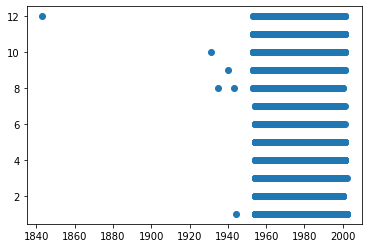

In [14]:
plt.scatter([d.year for d in cust_demo_df['DOB']], [d.month for d in cust_demo_df['DOB']])

In [15]:
from datetime import datetime
cust_demo_df['age'] = (datetime.now() - cust_demo_df['DOB']) // 365

In [16]:
cust_demo_df['age'].describe()

count                        3913
mean      43 days 03:34:13.285931
std       12 days 19:17:57.825070
min       18 days 11:19:44.796282
25%       33 days 12:18:55.481213
50%       43 days 02:58:42.330528
75%       52 days 15:04:37.399021
max      176 days 19:09:13.563405
Name: age, dtype: object

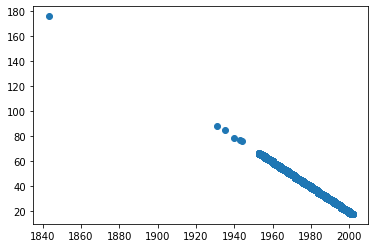

In [17]:
plt.scatter([d.year for d in cust_demo_df['DOB']], cust_demo_df['age'].dt.days)

In [18]:
print('job_title:', cust_demo_df['job_title'].unique())
print('blanks:', pd.isna(cust_demo_df['job_title']).sum())

job_title: ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Operator' 'Web D

In [19]:
print('job_industry_category:', cust_demo_df['job_industry_category'].unique())
print('blanks:', pd.isna(cust_demo_df['job_industry_category']).sum())

job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
blanks: 656


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([2000.,    0.,    0.,    0.,    0.,  979.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

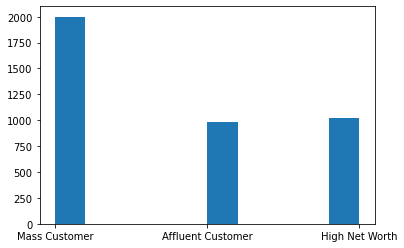

In [20]:
print('wealth_segment:', cust_demo_df['wealth_segment'].unique())
print('blanks:', pd.isna(cust_demo_df['wealth_segment']).sum())
plt.hist(cust_demo_df['wealth_segment'][pd.notna(cust_demo_df['wealth_segment'])])

deceased_indicator: ['N' 'Y']
blanks: 0


(array([3.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

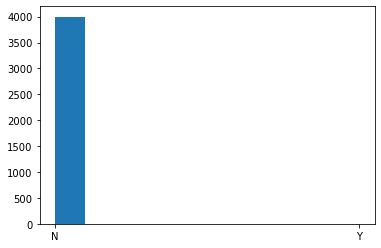

In [21]:
print('deceased_indicator:', cust_demo_df['deceased_indicator'].unique())
print('blanks:', pd.isna(cust_demo_df['deceased_indicator']).sum())
plt.hist(cust_demo_df['deceased_indicator'][pd.notna(cust_demo_df['deceased_indicator'])])

In [22]:
cust_demo_df['deceased_indicator'][cust_demo_df['deceased_indicator'] == 'Y'].count()

2

owns_car: ['Yes' 'No']
blanks: 0


(array([2024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

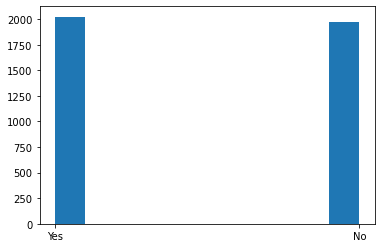

In [23]:
print('owns_car:', cust_demo_df['owns_car'].unique())
print('blanks:', pd.isna(cust_demo_df['owns_car']).sum())
plt.hist(cust_demo_df['owns_car'][pd.notna(cust_demo_df['owns_car'])])

In [24]:
cust_demo_df['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [25]:
print('tenure blanks:', pd.isna(cust_demo_df['tenure']).sum())

tenure blanks: 87


## CustomerAddress

In [26]:
cust_addr_df = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress')
cust_addr_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [27]:
cust_addr_df.shape

(3999, 6)

In [28]:
cust_addr_df[cust_addr_df.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [29]:
print('customer_id blanks:', pd.isna(cust_addr_df['customer_id']).sum())

customer_id blanks: 0


In [30]:
pd.notna(cust_addr_df['customer_id'].unique()).sum()

3999

In [31]:
print('customer_ids not in demographics dataset:', \
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in cust_addr_df['customer_id']]))

customer_ids not in demographics dataset: 4


In [32]:
print('address blanks:', pd.isna(cust_addr_df['address']).sum())

address blanks: 0


In [33]:
print('postcode blanks:', pd.isna(cust_addr_df['postcode']).sum())

postcode blanks: 0


state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
blanks: 0


(array([  86.,    0.,  838.,    0.,    0.,  939.,    0., 2054.,    0.,
          82.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

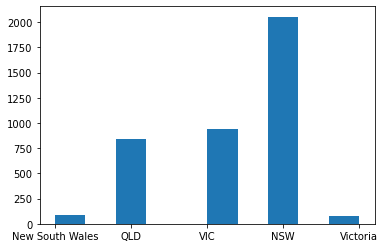

In [34]:
print('state:', cust_addr_df['state'].unique())
print('blanks:', pd.isna(cust_addr_df['state']).sum())
plt.hist(cust_addr_df['state'][pd.notna(cust_addr_df['state'])])

In [35]:
print('country:', cust_addr_df['country'].unique())
print('blanks:', pd.isna(cust_addr_df['country']).sum())

country: ['Australia']
blanks: 0


In [36]:
cust_addr_df['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

property_valuation blanks: 0


(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

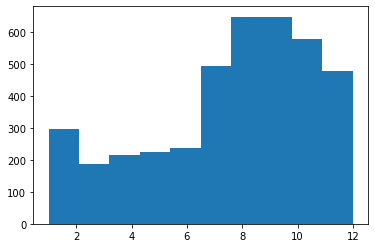

In [37]:
print('property_valuation blanks:', pd.isna(cust_addr_df['property_valuation']).sum())
plt.hist(cust_addr_df['property_valuation'], bins=10)

## Transactions

In [38]:
txns_df = pd.read_excel(file_name, header=1, sheet_name='Transactions')
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [39]:
txns_df.shape

(20000, 13)

In [40]:
txns_df[txns_df.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [41]:
txns_df['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [42]:
print('list_price blanks:', pd.isna(txns_df['list_price']).sum())

list_price blanks: 0


In [43]:
txns_df['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [44]:
print('standard_cost blanks:', pd.isna(txns_df['standard_cost']).sum())

standard_cost blanks: 197


In [45]:
txns_df['profit'] = txns_df['list_price'] - txns_df['standard_cost']
txns_df['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

In [46]:
print('transaction_id blanks:', pd.isna(txns_df['transaction_id']).sum())

transaction_id blanks: 0


In [47]:
print('product_id blanks:', pd.isna(txns_df['product_id']).sum())

product_id blanks: 0


In [48]:
print('customer_id blanks:', pd.isna(txns_df['customer_id']).sum())

customer_id blanks: 0


In [49]:
pd.notna(txns_df['customer_id'].unique()).sum()

3494

In [50]:
print('customer_ids not in demographics dataset:', \
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in cust_addr_df['customer_id']]))
print('customer_ids not in addresses dataset:', \
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in txns_df['customer_id']]))

customer_ids not in demographics dataset: 4
customer_ids not in addresses dataset: 3


In [51]:
txns_df['transaction_date'].describe()

count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [52]:
print('transaction_date blanks:', pd.isna(txns_df['transaction_date']).sum())

transaction_date blanks: 0


online_order: [ 0.  1. nan]
blanks: 360


(array([9811.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9829.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

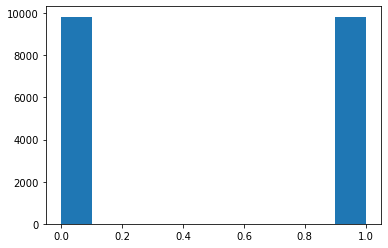

In [53]:
print('online_order:', txns_df['online_order'].unique())
print('blanks:', pd.isna(txns_df['online_order']).sum())
plt.hist(txns_df['online_order'][pd.notna(txns_df['online_order'])])

order_status: ['Approved' 'Cancelled']
blanks: 0


(array([19821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   179.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

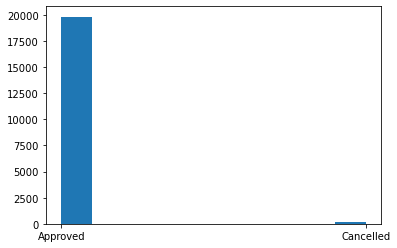

In [54]:
print('order_status:', txns_df['order_status'].unique())
print('blanks:', pd.isna(txns_df['order_status']).sum())
plt.hist(txns_df['order_status'][pd.notna(txns_df['order_status'])])

In [55]:
txns_df['order_status'][txns_df['order_status'] == 'Cancelled'].count()

179

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
blanks: 197


(array([4253.,    0., 2990.,    0., 3043.,    0., 2910.,    0., 3312.,
        3295.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

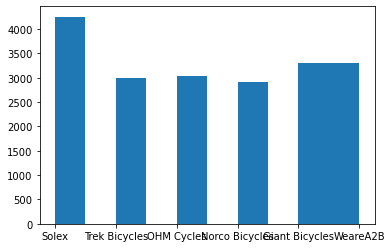

In [56]:
print('brand:', txns_df['brand'].unique())
print('blanks:', pd.isna(txns_df['brand']).sum())
plt.hist(txns_df['brand'][pd.notna(txns_df['brand'])])

product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
blanks: 197


(array([14176.,     0.,     0.,  3970.,     0.,     0.,   423.,     0.,
            0.,  1234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

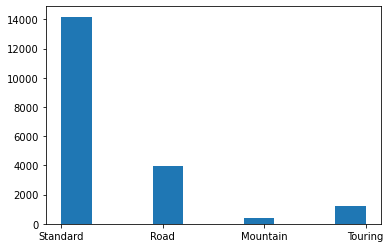

In [57]:
print('product_line:', txns_df['product_line'].unique())
print('blanks:', pd.isna(txns_df['product_line']).sum())
plt.hist(txns_df['product_line'][pd.notna(txns_df['product_line'])])

product_class: ['medium' 'low' 'high' nan]
blanks: 197


(array([13826.,     0.,     0.,     0.,     0.,  2964.,     0.,     0.,
            0.,  3013.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

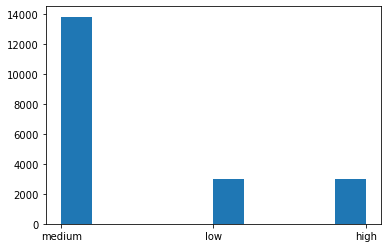

In [58]:
print('product_class:', txns_df['product_class'].unique())
print('blanks:', pd.isna(txns_df['product_class']).sum())
plt.hist(txns_df['product_class'][pd.notna(txns_df['product_class'])])

product_size: ['medium' 'large' 'small' nan]
blanks: 197


(array([12990.,     0.,     0.,     0.,     0.,  3976.,     0.,     0.,
            0.,  2837.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

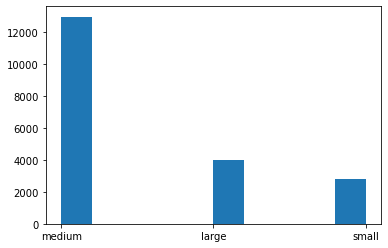

In [59]:
print('product_size:', txns_df['product_size'].unique())
print('blanks:', pd.isna(txns_df['product_size']).sum())
plt.hist(txns_df['product_size'][pd.notna(txns_df['product_size'])])

In [60]:
print('product_first_sold_date blanks:', pd.isna(txns_df['product_first_sold_date']).sum())

product_first_sold_date blanks: 197


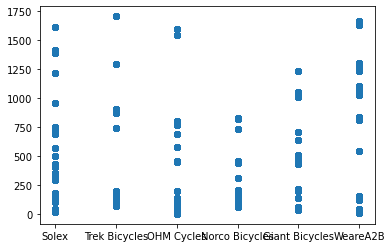

In [61]:
plt.scatter(txns_df['brand'][pd.notna(txns_df['brand'])], txns_df['profit'][pd.notna(txns_df['brand'])])